In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Cesta k spracovaným dátam

In [13]:
processed_data_path = './Data_processed/processed_data_martin.csv'

Načítanie dát

In [14]:
martin_data = pd.read_csv(processed_data_path)

# Popis analýzy a výsledkov

Cieľom tejto analýzy bolo preskúmať vzťah medzi environmentálnymi faktormi a meškaniami autobusov v okrese Martin.  
Analyzované boli údaje o meškaniach pri príchode (**DelayMinArrival**) v kombinácii s meteorologickými údajmi, ako sú teplota vzduchu, rýchlosť vetra, miera zrážok a ďalšie.

---


## Základné štatistiky

In [15]:
print("Základné štatistiky dát:")
print(martin_data.describe())

Základné štatistiky dát:
             RouteId  RouteSubId         TripId         StopId    OrderNumber  \
count  301714.000000    301714.0  301714.000000  301714.000000  301714.000000   
mean   506510.405782         1.0      33.596615   26514.470548      13.730298   
std       592.847277         0.0      61.617289   12182.282726       9.596642   
min    506401.000000         1.0       1.000000     781.000000       1.000000   
25%    506405.000000         1.0      11.000000   20486.000000       6.000000   
50%    506408.000000         1.0      24.000000   20506.000000      12.000000   
75%    506411.000000         1.0      41.000000   36403.000000      20.000000   
max    511408.000000         1.0     554.000000   56012.000000      54.000000   

       RegularArrMinutes  RegDepMinutes  FirstTicketMinutes  PassCountArrival  \
count      301714.000000  301714.000000        77009.000000     301714.000000   
mean          762.316840     762.317569          725.104662          9.317582   
st

### Meškania autobusov:
- **Priemerné meškanie pri príchode**: približne **1.1 minúty**, pričom maximálne meškanie dosiahlo až **56.18 minút**.  
- **Meškania pri odchode**: mierne vyššie, s priemerom **1.32 minút**.  
- **Medián meškania pri príchode**: **0.52 minúty**, čo naznačuje, že väčšina autobusov má malé alebo žiadne meškanie.

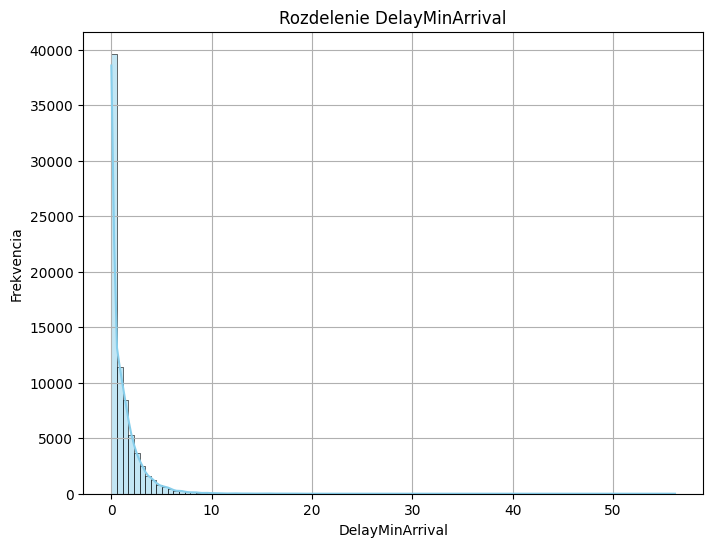

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(data=martin_data, x='DelayMinArrival', bins=100, kde=True, color='skyblue')
plt.title(f'Rozdelenie {'DelayMinArrival'}')
plt.xlabel('DelayMinArrival')
plt.ylabel('Frekvencia')
plt.grid(True)
plt.show()

### Počasie:
- **Priemerná teplota vzduchu**: **16.55 °C** (minimum: **1 °C**, maximum: **30 °C**).  
- **Miera zrážok**: vo väčšine prípadov nulová, čo naznačuje prevládajúce suché počasie.  
- **Rýchlosť vetra**: priemer **2.13 m/s**, maximum **6.1 m/s**.  
- **Hĺbka snehu a jeho ekvivalent**: vo všetkých záznamoch **nulové**, čo svedčí o tom, že analyzované obdobie nezahŕňalo zimné mesiace.

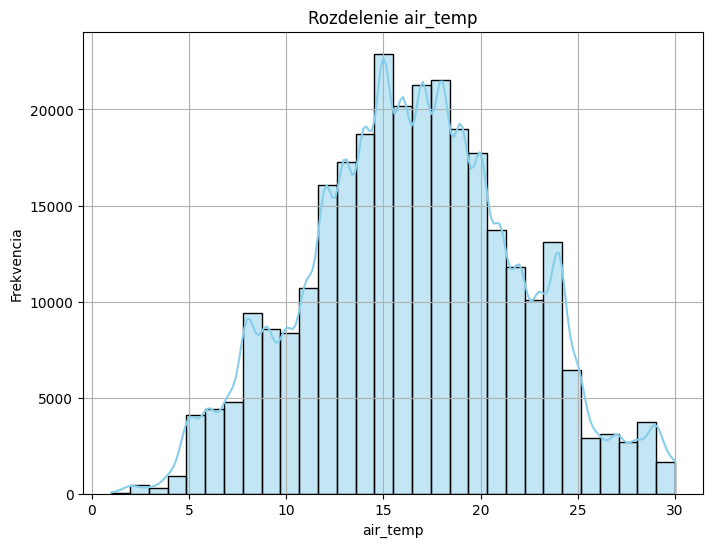

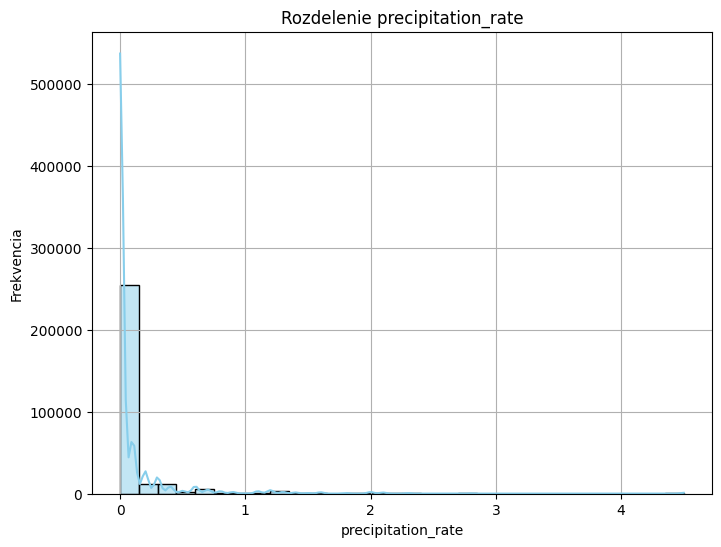

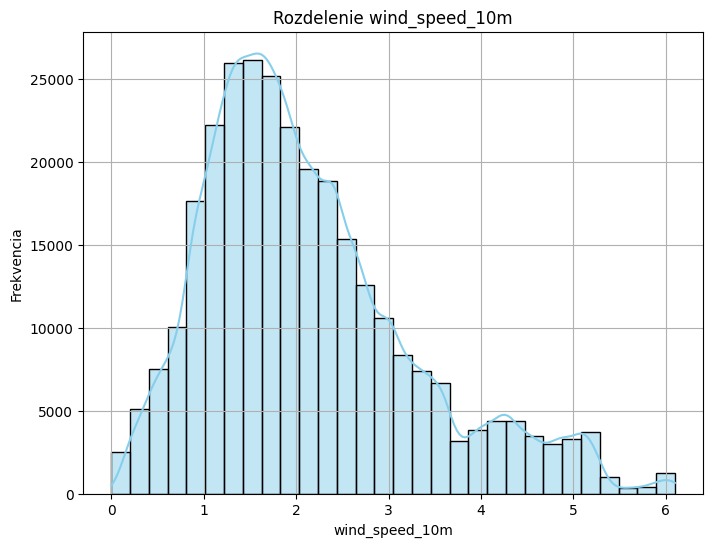

In [17]:
variables = ['air_temp', 'precipitation_rate', 'wind_speed_10m']
for var in variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=martin_data, x=var, bins=30, kde=True, color='skyblue')
    plt.title(f'Rozdelenie {var}')
    plt.xlabel(var)
    plt.ylabel('Frekvencia')
    plt.grid(True)
    plt.show()


---

## Korelačná analýza

Korelačná matica ukázala len slabé vzťahy medzi meškaniami a environmentálnymi faktormi:
- **Teplota vzduchu**: Slabá pozitívna korelácia s meškaniami (korelácia približne **0.12**).  
- **Miera zrážok**: Prakticky žiadna korelácia s meškaniami.  
- **Rýchlosť vetra**: Slabá pozitívna korelácia (korelácia približne **0.06**).  

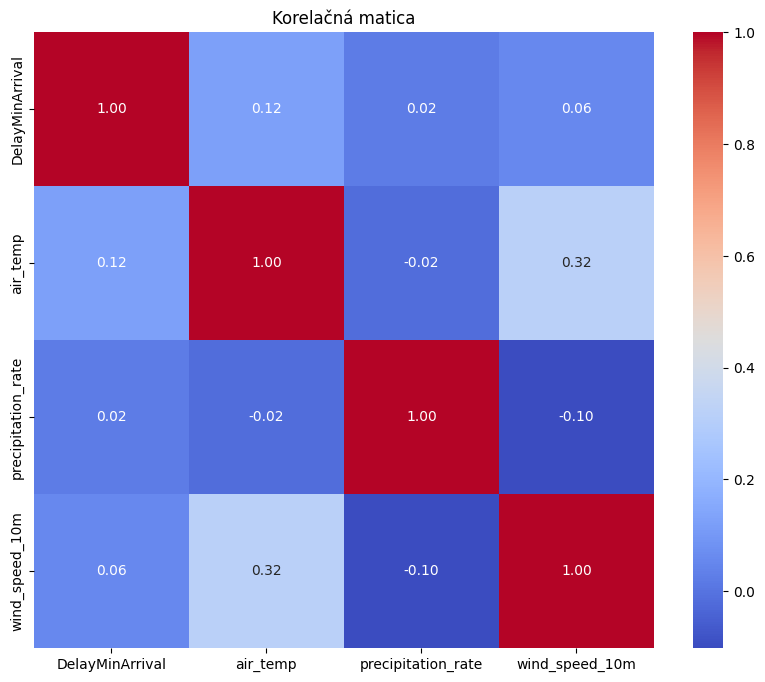

In [19]:
plt.figure(figsize=(10, 8))
corr = martin_data[['DelayMinArrival'] + variables].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelačná matica')
plt.show()

## Vizualizácia vzťahov

Na preskúmanie vzťahov medzi environmentálnymi faktormi a meškaniami autobusov boli vytvorené scatter ploty pre každú premennú:
- **Teplota vzduchu vs Meškanie**: Slabý pozitívny trend, čo naznačuje, že vyššie teploty môžu mierne zvyšovať meškania.
- **Miera zrážok vs Meškanie**: Žiadny viditeľný trend, čo potvrdzuje nízku koreláciu medzi týmito premennými.
- **Rýchlosť vetra vs Meškanie**: Minimálny pozitívny trend, no bez výrazného vplyvu na meškania.

Grafy umožňujú lepšiu vizuálnu interpretáciu dát, no nenaznačujú významné vzťahy medzi premennými.

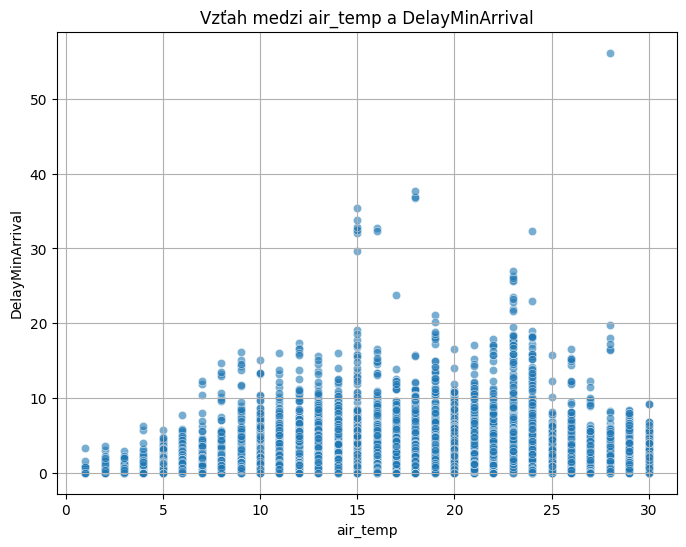

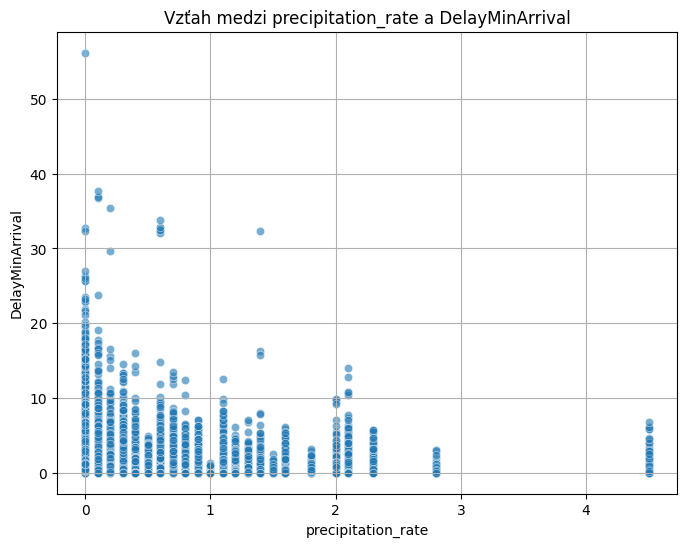

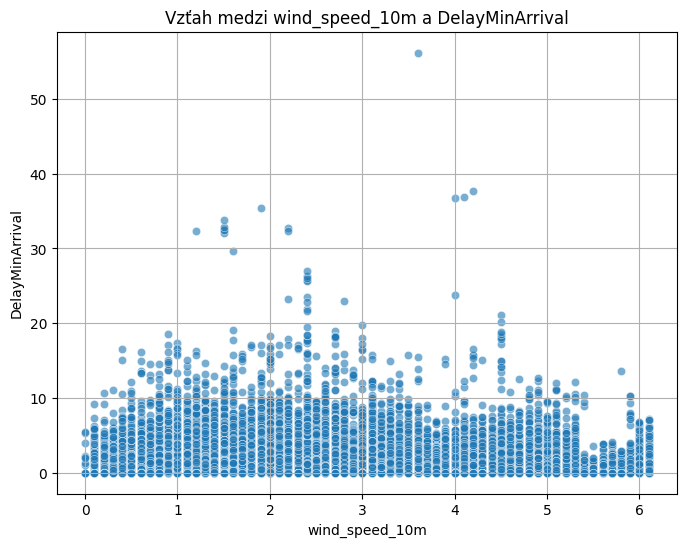

In [20]:
for var in variables:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=martin_data, x=var, y='DelayMinArrival', alpha=0.6)
    plt.title(f'Vzťah medzi {var} a DelayMinArrival')
    plt.xlabel(var)
    plt.ylabel('DelayMinArrival')
    plt.grid(True)
    plt.show()

---

## Interpretácia výsledkov

- Zvolené environmentálne faktory sa zdajú mať len **minimálny vplyv na meškania autobusov** z analyzovaných dát.  
- Malý priemer a medián meškaní naznačujú, že väčšina autobusov prichádzala relatívne načas.  
- Nedostatok dát o zimných mesiacoch obmedzuje možnosť analyzovať vplyv snehu a nízkych teplôt na meškania.


---

## Záver

Na základe tejto analýzy možno konštatovať, že **environmentálne faktory nemajú výrazný vplyv na meškania autobusov** v analyzovanej oblasti za dané časové obdobie.  
Pre presnejšie závery by bolo užitočné zahrnúť viac dát z rôznych ročných období.